In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

In [11]:
# prep for double exponential fits
def double_exp(x, a, b, c, d):
    return a * np.exp(b * x) + c * np.exp(d * x)
def triple_exp(x, a, b, c, d, e, f):
    return a * np.exp(b * x) + c * np.exp(d * x) + e * np.exp(f * x)

# Correlation Propagator

In [3]:
correlations = np.genfromtxt("correlation_to_equal_time.csv", delimiter=",")
average = correlations.mean(axis=1)
sem = stats.sem(correlations, axis=1)
average_to_max = average[0:np.argmax(average)]
sem_to_max = sem[0:np.argmax(average)]
# Adjust the following line for each system to make everything ns.
taus = np.arange(1,np.argmax(average)+1)/10


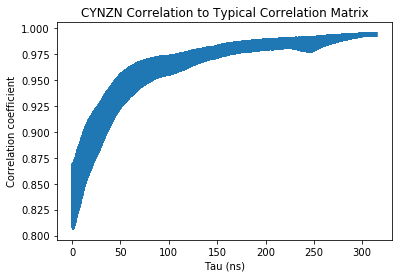

In [4]:
plt.errorbar(taus, average_to_max, sem_to_max)
plt.title('CYNZN Correlation to Typical Correlation Matrix')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.savefig('Cynzn_prop_max_correlation_to_equaltime.png')

Bars are standard error

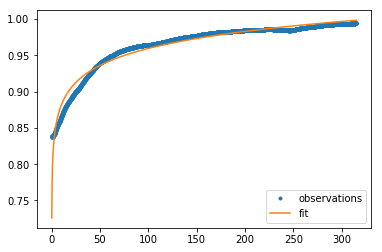

In [5]:
np.polyfit(np.log(taus), average_to_max, 1)
#y = 0.03384625*log(x) + 0.80380655
yhat = 0.03384625*np.log(taus) + 0.80380655
plt.plot(taus, average_to_max, '.', taus, yhat, '-')
plt.legend(['observations', 'fit'])
plt.savefig('FIT_CYNZN_prop_max_correlation_to_equaltime.png')

$$y = 0.03384625*log(x) + 0.80380655$$

[ -5.21263884e+01   2.34166334e-03   5.30156401e+01   2.31629178e-03]


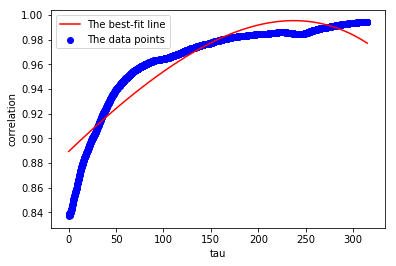

In [9]:
popt, pcov = curve_fit(double_exp,taus,average_to_max,p0=(0.8,0.03,0,0),maxfev=10000)
print(popt)
curvey = double_exp(taus,popt[0],popt[1], popt[2], popt[3]) # This is your y axis fit-line
plt.plot(taus, curvey, 'red', label='The best-fit line')
plt.scatter(taus,average_to_max, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('tau')
plt.ylabel('correlation')
plt.show()
plt.savefig('doubleFIT_CYNZN_prop_max_correlation_to_equaltime.png')

$$y = -5.21263884\times10^{1} e^{2.34166334\times10^{-03}x} + 5.30156401\times10^{1} e^{2.31629178\times10^{-03}x}$$

[ -1.79772229e-04   3.21176786e-03  -1.46041633e+06  -1.89622664e-03
   1.46041720e+06  -1.89622466e-03]


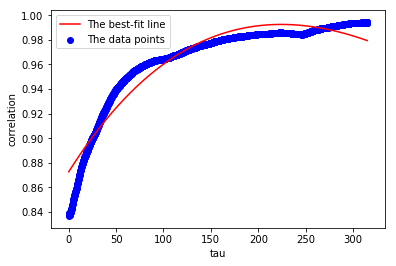

In [12]:
popt, pcov = curve_fit(triple_exp,taus,average_to_max,p0=(0.8,0.03,0,0,0,0),maxfev=10000)
print(popt)
curvey = triple_exp(taus,popt[0],popt[1], popt[2], popt[3], popt[4], popt[5]) # This is your y axis fit-line
plt.plot(taus, curvey, 'red', label='The best-fit line')
plt.scatter(taus,average_to_max, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('tau')
plt.ylabel('correlation')
plt.show()
plt.savefig('tripleFIT_CYNZN_prop_max_correlation_to_equaltime.png')

$$y = -1.79772229\times10^{-4} e^{3.21176786\times10^{-03}x} + -1.46041633\times10^{6} e^{-1.89622664\times10^{-03}x} + 1.46041720\times10^{6} e^{-1.89622466\times10^{-3}}$$

# Time Lagged

In [14]:
TLcorrelations = np.genfromtxt("TLcorrelation_to_equal_time.csv", delimiter=",")
TLaverage = TLcorrelations.mean(axis=1)
TLsem = stats.sem(TLcorrelations, axis=1)
# Adjust the following line for each system to make everything ns.
TLtaus = np.arange(1,len(TLaverage)+1)/10

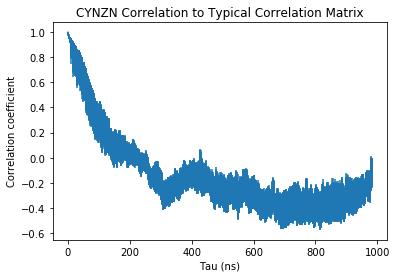

In [15]:
plt.errorbar(TLtaus, TLaverage, TLsem)
plt.title('CYNZN Correlation to Typical Correlation Matrix')
plt.xlabel('Tau (ns)')
plt.ylabel('Correlation coefficient')
plt.savefig('Cynzn_TL_correlation_to_equaltime.png')

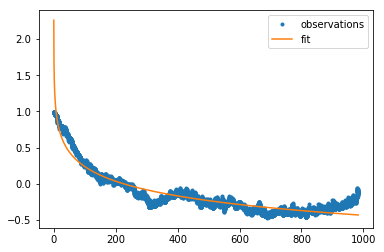

In [16]:
np.polyfit(np.log(TLtaus), TLaverage, 1)
#y = -0.29280822*log(x) + 1.58620121
yhat = -0.29280822*np.log(TLtaus) + 1.58620121
plt.plot(TLtaus, TLaverage, '.', TLtaus, yhat, '-')
plt.legend(['observations', 'fit'])
plt.savefig('FIT_CYNZN_TL_correlation_to_equaltime.png')

$$y = -0.29280822*log(x) + 1.58620121$$

[  1.26056990e+00  -7.31763249e-03  -2.77168993e-01   2.47792464e-04]


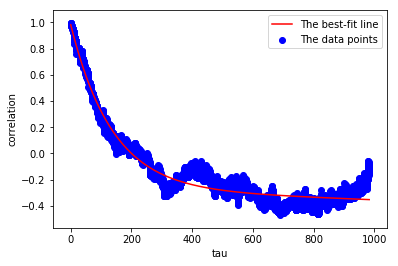

In [25]:
popt, pcov = curve_fit(double_exp,TLtaus,TLaverage,p0=(1.6,-0.29,0,0),maxfev=10000)
print(popt)
curvey = double_exp(TLtaus,popt[0],popt[1],popt[2],popt[3]) # This is your y axis fit-line
plt.plot(TLtaus, curvey, 'red', label='The best-fit line')
plt.scatter(TLtaus, TLaverage, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('tau')
plt.ylabel('correlation')
plt.show()
plt.savefig('doubleFIT_CYNZN_TL_correlation_to_equaltime.png')

$$y = 1.26056990 e^{-7.31763249\times10^{-03}x} + -2.77168993\times10^{-1} e^{2.47792464\times10^{-04}x}$$

[  1.26056955e+00  -7.31767501e-03  -1.38436737e-01   2.47553752e-04
  -1.38729964e-01   2.48049592e-04]


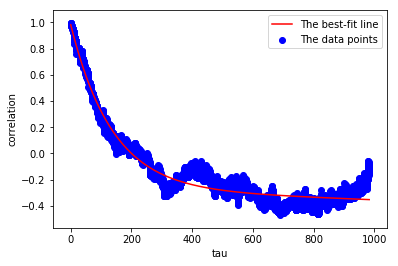

In [26]:
popt, pcov = curve_fit(triple_exp,TLtaus,TLaverage,p0=(1.6,-0.29,0,0,0,0),maxfev=10000)
print(popt)
curvey = triple_exp(TLtaus,popt[0],popt[1],popt[2],popt[3], popt[4], popt[5]) # This is your y axis fit-line
plt.plot(TLtaus, curvey, 'red', label='The best-fit line')
plt.scatter(TLtaus, TLaverage, c='b',label='The data points')
plt.legend(loc='best')
plt.xlabel('tau')
plt.ylabel('correlation')
plt.show()
plt.savefig('tripleFIT_CYNZN_TL_correlation_to_equaltime.png')

$$y = 1.26056955 e^{-7.31767501\times10^{-03}x} + -1.38436737\times10^{-1} e^{2.47553752\times10^{-04}x} + -1.38729964\times10^{-1} e^{2.48049592\times10^{-4}}$$